# Simulation Data

Orbit provide the functions to generate the simulation data including: 

1. Generate the data with time-series trend:
     - random walk
     - arima
2. Generate the data with seasonality
     - discrete
     - fourier series
3. Generate regression data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from orbit.utils.simulation import make_trend, make_seasonality, make_regression

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [8, 8]

%matplotlib inline

## Trend

### Random Walk

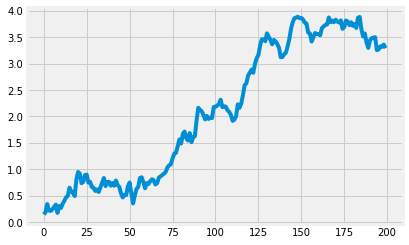

In [3]:
rw = make_trend(200, rw_loc=0.02, rw_scale=0.1, seed=2020)
_ = plt.plot(rw)

### ARMA

reference for the ARMA process: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.ArmaProcess.html

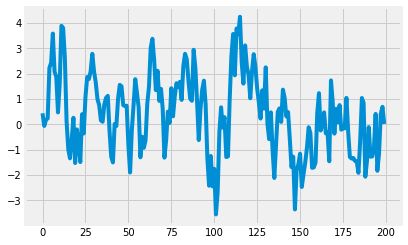

In [4]:
arma_trend =  make_trend(200, method='arma', arma=[.8, -.1], seed=2020)
_ = plt.plot(arma_trend)

## Seasonality

### Discrete

generating a weekly seasonality(=7) where seasonality wihtin a day is constant(duration=24) on an hourly time-series

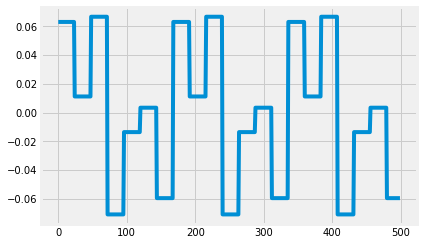

In [5]:
ds = make_seasonality(500, seasonality=7, duration=24, method='discrete', seed=2020)
_ = plt.plot(ds)

### Fourier

generating a sine-cosine wave seasonality for a annual seasonality(=365) using fourier series

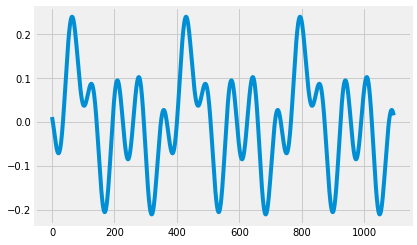

In [7]:
fs = make_seasonality(365 * 3, seasonality=365, method='fourier', order=5, seed=2020)
_ = plt.plot(fs)

In [8]:
fs

array([0.01162034, 0.00739299, 0.00282248, ..., 0.02173615, 0.01883928,
       0.01545216])

## Regression

generating multiplicative time-series with trend, seasonality and regression components

In [9]:
# define the regression coefficients
coefs = [0.1, -.33, 0.8]

In [10]:
x, y, coefs = make_regression(200, coefs, scale=2.0, seed=2020)

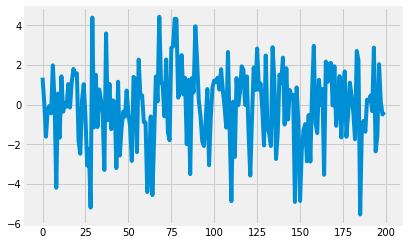

In [11]:
_ = plt.plot(y)

In [12]:
# check if get the coefficients as set up 
reg = LinearRegression().fit(x, y)
print(reg.coef_)

[ 0.1586677  -0.33126796  0.7974205 ]
